In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pickle
import sklearn.ensemble
import sklearn.neural_network
import datetime
import numpy as np
import random

import utils

In [2]:
high_management = [86, 7, 27, 36, 69, 70, 85, 104, 121, 148, 156, 163]
middle_management = [76, 90, 136, 137, 143, 152, 47, 162]

In [3]:
with open("G_communication.pkl", "rb") as f:
    G_communication = pickle.load(f)
    
with open("G_reportsto.pkl", "rb") as f:
    G_reportsto = pickle.load(f)
    
with open("G_both.pkl", "rb") as f:
    G_both = pickle.load(f)

# Classification - not ICA

In [4]:
def classify_other(G_name, pct_uncover, attr_uncover, clf, num_iterations=50):
    with open(G_name, "rb") as f:
        G = pickle.load(f)

    num_nodes = G.number_of_nodes()
    num_nodes_to_uncover = int(num_nodes * pct_uncover)
    
    nodes_to_uncover = random.sample(G.nodes, num_nodes_to_uncover)
    
    utils.uncover_nodes(G, nodes_to_uncover)
#     utils.set_all_class_node_attrs(G)
    
    df_train, labels_train, df_test, labels_test = utils.create_df(G, nodes_to_uncover)
    
    clf = clf.fit(df_train, labels_train)
    y_pred = clf.predict(df_test)
    y_true = labels_test
    
    metrics = utils.count_classification_metrics(y_true, y_pred)
    metrics.update({'confusion_matrix': utils.count_confusion_matrix(y_true, y_pred).tolist()})
    
    return metrics



# classify_other('G_communication.pkl', 0.1, None, sklearn.ensemble.AdaBoostClassifier())

In [11]:
def perform_experiments(params, num_experiments=10):
    start = datetime.datetime.now()
    all_results = pd.DataFrame()
    experiment_method_params = utils.get_next_params(params)
    filename = f"other_results_{str(start).replace(':', '-').replace(' ', '_')}.csv"
    print(filename)
    for method_params in experiment_method_params:
        for _ in range(num_experiments):
#             print(method_params)
            results = classify_other(*method_params.values())
#             print(results)
            results.update(method_params)
            all_results = all_results.append(results, ignore_index=True)
        all_results.to_csv(filename)
#     print(filename)
    return filename

In [12]:
params = {
    'G': ["G_reportsto.pkl", "G_communication.pkl", "G_both.pkl"],
    'pct_uncover': [0.1, 0.2, 0.3], 
    'attr_uncover': [None], 
    'clf': [sklearn.ensemble.AdaBoostClassifier(), sklearn.ensemble.RandomForestClassifier(), sklearn.neural_network.MLPClassifier()], 
    'num_iterations': [None]
}


In [13]:
%%time

filename = perform_experiments(params, num_experiments=10)

other_results_2020-04-02_20-32-09.990777.csv


/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/metrics/_classifica

/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: S

/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/neural_network/_mul

/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/metrics/_classifica

/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/metrics/_classifica

/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision 

/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels wi

/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels wi

/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels wi

CPU times: user 1min 46s, sys: 4.64 s, total: 1min 51s
Wall time: 1min 42s


/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/edzia/PWr/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
filename = "other_results_2020-04-02_20-32-09.990777.csv"
results = pd.read_csv(filename)
results = results.drop(columns="num_iterations")
results = results.drop(columns="attr_uncover")
results['clf'] = results['clf'].apply(lambda row: row.split('(')[0])
results = results.sort_values('test_f1_macro', ascending=False)

In [17]:
results.head(50)

,Unnamed: 0,G,clf,confusion_matrix,pct_uncover,test_accuracy,test_f1_macro,test_f1_micro,test_f1_weighted,test_precision_macro,test_precision_micro,test_precision_weighted,test_recall_macro,test_recall_micro,test_recall_weighted
38,38,G_reportsto.pkl,AdaBoostClassifier,"[[120, 1, 0], [1, 6, 0], [0, 0, 8]]",0.2,0.985294,0.949626,0.985294,0.985294,0.949626,0.985294,0.985294,0.949626,0.985294,0.985294
63,63,G_reportsto.pkl,AdaBoostClassifier,"[[102, 1, 0], [1, 5, 0], [0, 0, 10]]",0.3,0.983193,0.941208,0.983193,0.983193,0.941208,0.983193,0.983193,0.941208,0.983193,0.983193
61,61,G_reportsto.pkl,AdaBoostClassifier,"[[102, 2, 0], [0, 5, 0], [0, 0, 10]]",0.3,0.983193,0.941208,0.983193,0.984512,0.904762,0.983193,0.987995,0.993590,0.983193,0.983193
31,31,G_reportsto.pkl,AdaBoostClassifier,"[[120, 1, 0], [1, 4, 0], [0, 0, 10]]",0.2,0.985294,0.930579,0.985294,0.985294,0.930579,0.985294,0.985294,0.930579,0.985294,0.985294
35,35,G_reportsto.pkl,AdaBoostClassifier,"[[120, 2, 0], [1, 5, 0], [0, 0, 8]]",0.2,0.977941,0.918962,0.977941,0.978744,0.902007,0.977941,0.979981,0.938980,0.977941,0.977941
65,65,G_reportsto.pkl,AdaBoostClassifier,"[[104, 3, 0], [0, 5, 0], [0, 0, 7]]",0.3,0.974790,0.918338,0.974790,0.977520,0.875000,0.974790,0.984244,0.990654,0.974790,0.974790
36,36,G_reportsto.pkl,AdaBoostClassifier,"[[122, 0, 0], [2, 3, 0], [0, 0, 9]]",0.2,0.985294,0.913957,0.985294,0.983516,0.994624,0.985294,0.985531,0.866667,0.985294,0.985294
73,73,G_reportsto.pkl,RandomForestClassifier,"[[105, 3, 0], [0, 4, 0], [0, 0, 7]]",0.3,0.974790,0.904396,0.974790,0.978050,0.857143,0.974790,0.985594,0.990741,0.974790,0.974790
34,34,G_reportsto.pkl,AdaBoostClassifier,"[[119, 2, 0], [0, 5, 1], [0, 0, 9]]",0.2,0.977941,0.902755,0.977941,0.978922,0.871429,0.977941,0.980777,0.938935,0.977941,0.977941
67,67,G_reportsto.pkl,AdaBoostClassifier,"[[106, 1, 0], [2, 3, 0], [0, 0, 7]]",0.3,0.974790,0.884238,0.974790,0.973448,0.910494,0.974790,0.972845,0.863551,0.974790,0.974790


In [18]:
results[results['G'] == 'G_reportsto.pkl'].head(10)

,Unnamed: 0,G,clf,confusion_matrix,pct_uncover,test_accuracy,test_f1_macro,test_f1_micro,test_f1_weighted,test_precision_macro,test_precision_micro,test_precision_weighted,test_recall_macro,test_recall_micro,test_recall_weighted
38,38,G_reportsto.pkl,AdaBoostClassifier,"[[120, 1, 0], [1, 6, 0], [0, 0, 8]]",0.2,0.985294,0.949626,0.985294,0.985294,0.949626,0.985294,0.985294,0.949626,0.985294,0.985294
63,63,G_reportsto.pkl,AdaBoostClassifier,"[[102, 1, 0], [1, 5, 0], [0, 0, 10]]",0.3,0.983193,0.941208,0.983193,0.983193,0.941208,0.983193,0.983193,0.941208,0.983193,0.983193
61,61,G_reportsto.pkl,AdaBoostClassifier,"[[102, 2, 0], [0, 5, 0], [0, 0, 10]]",0.3,0.983193,0.941208,0.983193,0.984512,0.904762,0.983193,0.987995,0.993590,0.983193,0.983193
31,31,G_reportsto.pkl,AdaBoostClassifier,"[[120, 1, 0], [1, 4, 0], [0, 0, 10]]",0.2,0.985294,0.930579,0.985294,0.985294,0.930579,0.985294,0.985294,0.930579,0.985294,0.985294
35,35,G_reportsto.pkl,AdaBoostClassifier,"[[120, 2, 0], [1, 5, 0], [0, 0, 8]]",0.2,0.977941,0.918962,0.977941,0.978744,0.902007,0.977941,0.979981,0.938980,0.977941,0.977941
65,65,G_reportsto.pkl,AdaBoostClassifier,"[[104, 3, 0], [0, 5, 0], [0, 0, 7]]",0.3,0.974790,0.918338,0.974790,0.977520,0.875000,0.974790,0.984244,0.990654,0.974790,0.974790
36,36,G_reportsto.pkl,AdaBoostClassifier,"[[122, 0, 0], [2, 3, 0], [0, 0, 9]]",0.2,0.985294,0.913957,0.985294,0.983516,0.994624,0.985294,0.985531,0.866667,0.985294,0.985294
73,73,G_reportsto.pkl,RandomForestClassifier,"[[105, 3, 0], [0, 4, 0], [0, 0, 7]]",0.3,0.974790,0.904396,0.974790,0.978050,0.857143,0.974790,0.985594,0.990741,0.974790,0.974790
34,34,G_reportsto.pkl,AdaBoostClassifier,"[[119, 2, 0], [0, 5, 1], [0, 0, 9]]",0.2,0.977941,0.902755,0.977941,0.978922,0.871429,0.977941,0.980777,0.938935,0.977941,0.977941
67,67,G_reportsto.pkl,AdaBoostClassifier,"[[106, 1, 0], [2, 3, 0], [0, 0, 7]]",0.3,0.974790,0.884238,0.974790,0.973448,0.910494,0.974790,0.972845,0.863551,0.974790,0.974790


In [19]:
results[results['G'] == 'G_communication.pkl'].head(10)

,Unnamed: 0,G,clf,confusion_matrix,pct_uncover,test_accuracy,test_f1_macro,test_f1_micro,test_f1_weighted,test_precision_macro,test_precision_micro,test_precision_weighted,test_recall_macro,test_recall_micro,test_recall_weighted
96,96,G_communication.pkl,AdaBoostClassifier,"[[121, 13, 2], [0, 4, 2], [1, 2, 6]]",0.1,0.867550,0.629854,0.867550,0.895166,0.600777,0.867550,0.937407,0.741013,0.867550,0.867550
99,99,G_communication.pkl,AdaBoostClassifier,"[[129, 3, 2], [3, 1, 2], [3, 0, 8]]",0.1,0.913907,0.618253,0.913907,0.909752,0.624074,0.913907,0.906475,0.618875,0.913907,0.913907
126,126,G_communication.pkl,AdaBoostClassifier,"[[109, 3, 5], [1, 1, 5], [1, 1, 8]]",0.2,0.880597,0.564745,0.880597,0.886189,0.542142,0.880597,0.901017,0.624827,0.880597,0.880597
121,121,G_communication.pkl,AdaBoostClassifier,"[[115, 0, 2], [5, 0, 2], [2, 0, 8]]",0.2,0.917910,0.563205,0.917910,0.894529,0.536430,0.917910,0.872788,0.594302,0.917910,0.917910
151,151,G_communication.pkl,AdaBoostClassifier,"[[104, 0, 2], [2, 0, 2], [2, 0, 5]]",0.3,0.931624,0.532321,0.931624,0.917975,0.506173,0.931624,0.905666,0.565139,0.931624,0.931624
154,154,G_communication.pkl,AdaBoostClassifier,"[[102, 1, 0], [3, 0, 1], [2, 3, 5]]",0.3,0.914530,0.532143,0.914530,0.908608,0.595535,0.914530,0.910429,0.496764,0.914530,0.914530
158,158,G_communication.pkl,AdaBoostClassifier,"[[99, 0, 2], [5, 0, 2], [3, 0, 6]]",0.3,0.897436,0.527834,0.897436,0.870329,0.508411,0.897436,0.844860,0.548955,0.897436,0.897436
159,159,G_communication.pkl,AdaBoostClassifier,"[[99, 0, 2], [5, 1, 0], [5, 2, 3]]",0.3,0.880342,0.521693,0.880342,0.859503,0.613863,0.880342,0.852427,0.482288,0.880342,0.880342
120,120,G_communication.pkl,AdaBoostClassifier,"[[102, 5, 14], [2, 1, 2], [1, 1, 6]]",0.2,0.813433,0.489774,0.813433,0.845183,0.462338,0.813433,0.898798,0.597658,0.813433,0.813433
122,122,G_communication.pkl,AdaBoostClassifier,"[[104, 16, 1], [4, 0, 1], [3, 1, 4]]",0.2,0.805970,0.489327,0.805970,0.843688,0.534535,0.805970,0.885841,0.453168,0.805970,0.805970


In [20]:
results[results['G'] == 'G_both.pkl'].head(10)

,Unnamed: 0,G,clf,confusion_matrix,pct_uncover,test_accuracy,test_f1_macro,test_f1_micro,test_f1_weighted,test_precision_macro,test_precision_micro,test_precision_weighted,test_recall_macro,test_recall_micro,test_recall_weighted
214,214,G_both.pkl,AdaBoostClassifier,"[[113, 1, 4], [4, 1, 2], [5, 0, 6]]",0.2,0.882353,0.561876,0.882353,0.870672,0.642077,0.882353,0.869817,0.548646,0.882353,0.882353
195,195,G_both.pkl,RandomForestClassifier,"[[131, 4, 2], [3, 1, 2], [2, 3, 5]]",0.1,0.895425,0.542960,0.895425,0.899347,0.547930,0.895425,0.903718,0.540957,0.895425,0.895425
211,211,G_both.pkl,AdaBoostClassifier,"[[115, 3, 2], [4, 1, 2], [5, 0, 4]]",0.2,0.882353,0.531676,0.882353,0.872226,0.559140,0.882353,0.864267,0.515212,0.882353,0.882353
224,224,G_both.pkl,RandomForestClassifier,"[[117, 3, 2], [3, 2, 0], [2, 5, 2]]",0.2,0.889706,0.511125,0.889706,0.890460,0.553005,0.889706,0.900735,0.527080,0.889706,0.889706
255,255,G_both.pkl,RandomForestClassifier,"[[100, 0, 2], [6, 1, 0], [8, 0, 2]]",0.3,0.865546,0.487213,0.865546,0.832366,0.792398,0.865546,0.852720,0.441083,0.865546,0.865546
186,186,G_both.pkl,AdaBoostClassifier,"[[128, 0, 7], [3, 0, 5], [3, 0, 7]]",0.1,0.882353,0.478144,0.882353,0.871264,0.441215,0.882353,0.866924,0.549383,0.882353,0.882353
222,222,G_both.pkl,RandomForestClassifier,"[[119, 1, 2], [3, 1, 0], [9, 0, 1]]",0.2,0.889706,0.475964,0.889706,0.864990,0.580577,0.889706,0.854101,0.441803,0.889706,0.889706
185,185,G_both.pkl,AdaBoostClassifier,"[[125, 4, 7], [2, 0, 5], [3, 0, 7]]",0.1,0.862745,0.474203,0.862745,0.866975,0.443320,0.862745,0.878781,0.539706,0.862745,0.862745
241,241,G_both.pkl,AdaBoostClassifier,"[[93, 3, 6], [6, 1, 0], [7, 0, 3]]",0.3,0.815126,0.463946,0.815126,0.803716,0.486897,0.815126,0.794739,0.451541,0.815126,0.815126
212,212,G_both.pkl,AdaBoostClassifier,"[[115, 0, 8], [4, 0, 4], [1, 0, 4]]",0.2,0.875000,0.442485,0.875000,0.870033,0.402778,0.875000,0.875919,0.578320,0.875000,0.875000


In [21]:
def plot_columns(df, columns_to_test, metric):
    for column in columns_to_test:
        if column in ['use_features', 'use_tags', 'clusters','most_common']:
            order = ['true', 'false']
        else:
            order = None
        bar = sns.barplot(x=column, y=metric, order=order,
                          data=df, palette='hls')
        bar.set_xticklabels(bar.get_xticklabels(), rotation=90)
#         bar.set(ylim=(0, 100))
        plt.tight_layout()
#         bar.figure.savefig(f'{PATH_TO_GRAPHICS}/experiments_blogs_posts/{method}_{column}_{metric}_combined.pdf')
        plt.show()

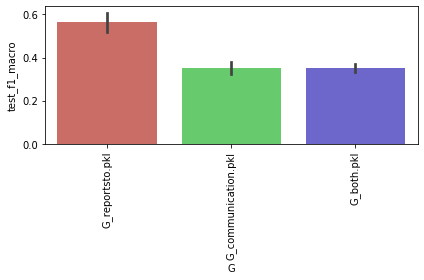

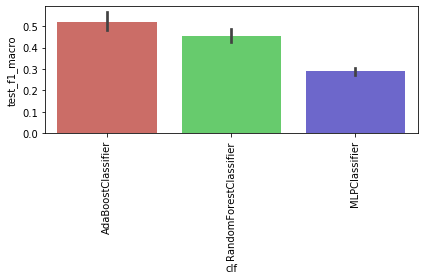

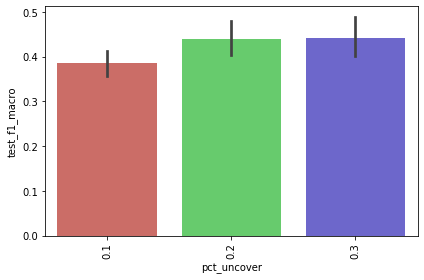

In [22]:
metric = 'test_f1_macro'
columns_to_test = ['G', 'clf', 'pct_uncover']

plot_columns(results, columns_to_test, metric)

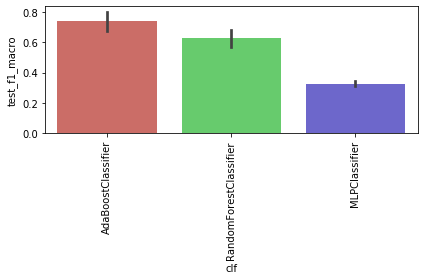

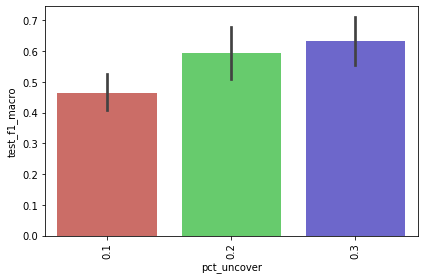

In [23]:
metric = 'test_f1_macro'
columns_to_test = ['clf', 'pct_uncover']

plot_columns(results[results['G'] == 'G_reportsto.pkl'], columns_to_test, metric)

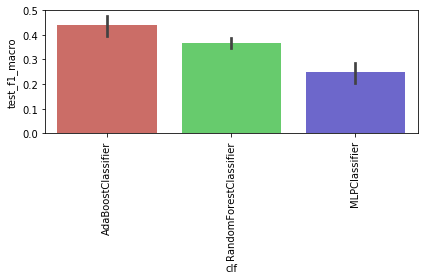

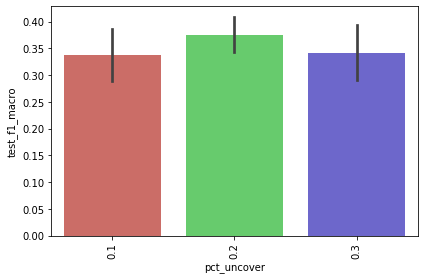

In [24]:
metric = 'test_f1_macro'
columns_to_test = ['clf', 'pct_uncover']

plot_columns(results[results['G'] == 'G_communication.pkl'], columns_to_test, metric)

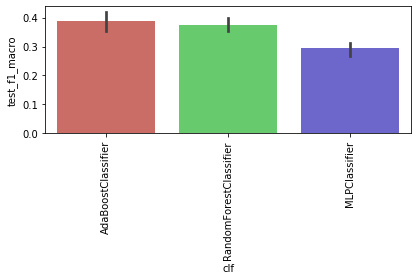

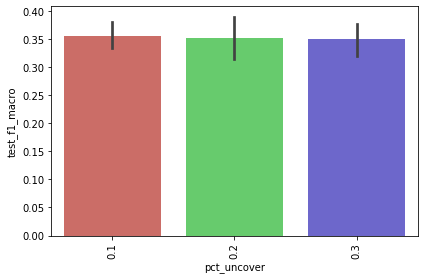

In [25]:
metric = 'test_f1_macro'
columns_to_test = ['clf', 'pct_uncover']

plot_columns(results[results['G'] == 'G_both.pkl'], columns_to_test, metric)

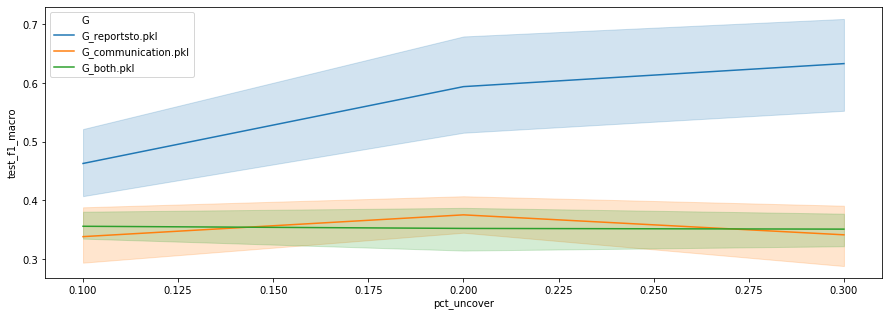

In [26]:
plt.figure(figsize=(15,5))
ax = sns.lineplot(data=results, x='pct_uncover', y='test_f1_macro', hue='G')

# Wnioski

- algorytm ICA jest dość prosty, lecz skuteczny
- najlepiej zdaje się sprawdzać cecha "degree" przy odkrywaniu węzłów
- odkrycie 20% etykiet nie daje dużo gorszych wyników niż odkrycie 30% etykiet (a czasem daje nawet lepsze wyniki), jednak zawsze odkrycie 20% jest lepsze niż odkrycie 10%.
- najlepsze działanie zaobserwowane było na grafie składającym się wyłącznie z osób, którym reportujemy (bez wysyłanych wiadomości - ale one są używane jako cechy)
- algorytm losowy osiąga średnio lepsze wyniki niż ICA (ale też odchylenie standardowe jest większe) - być może mają na to wpływ cechy "grafowe" użyte w klasyfikatorze, które same z siebie dobrze dyskryminują klasy
- najlepiej sprawdził się klasyfikator AdaBoost, chociaż Random Forest był niewiele gorszy